In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as plt

import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

2023-05-04 20:15:16.906092: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = 'latin', engine ='c', header=None)
df.columns=['target', 'id', 'date', 'flag', 'user', 'text']
df = df.sample(n=1000)
print(df.head())

        target          id                          date      flag  \
535627       0  2198050935  Tue Jun 16 15:32:26 PDT 2009  NO_QUERY   
247538       0  1982497761  Sun May 31 11:19:43 PDT 2009  NO_QUERY   
859163       4  1675967309  Fri May 01 20:45:40 PDT 2009  NO_QUERY   
866699       4  1677657955  Sat May 02 03:16:32 PDT 2009  NO_QUERY   
242867       0  1981412597  Sun May 31 09:05:56 PDT 2009  NO_QUERY   

                  user                                               text  
535627  ambitiouslexie                                      im still wet   
247538     BabieLondon  Feeling a little depressed today  because of t...  
859163        Mandazxo                                          PERFECT!   
866699    shannonkiely  is on her way to the mini with Carla and Mark!!!   
242867     heyitstanya     i wanna see @loveandreverie in virginia beach   


In [3]:
X = df['text']
y = df['target']

<Axes: >

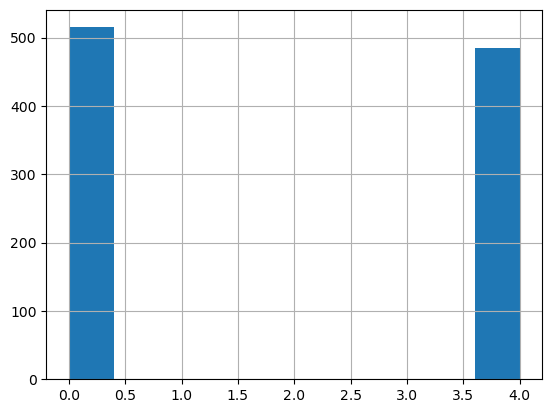

In [4]:
y.hist()

In [5]:
stemmer = PorterStemmer()

# Define a function to apply stemming to a list of words
def stem_words(words):
    return [stemmer.stem(word) for word in words.split()]

In [6]:
# Define a custom tokenizer function that removes stop words
'''stop_words = set(stopwords.words('english'))
def custom_tokenizer(text):
    tokens = word_tokenize(text)
    return [token for token in tokens if token.lower() not in stop_words]'''

"stop_words = set(stopwords.words('english'))\ndef custom_tokenizer(text):\n    tokens = word_tokenize(text)\n    return [token for token in tokens if token.lower() not in stop_words]"

In [7]:
# Define the stop words to be removed
stop_words = stopwords.words('english')

# Create a TF-IDF vectorizer with stop words and a minimum document frequency threshold of 10
vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=10, tokenizer=stem_words)

In [8]:
# Fit the vectorizer to the text data
vectorizer.fit(X)

# Transform the text data into a TF-IDF matrix
tfidf_matrix = vectorizer.transform(X)

/home/joe/anaconda3/envs/sentimentAnalysis/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/joe/anaconda3/envs/sentimentAnalysis/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  warnings.warn(


In [9]:
# Print the shape of the matrix
print(tfidf_matrix.shape)

print(vectorizer.vocabulary_)

(1000, 110)
{'im': 43, 'still': 83, 'feel': 19, 'littl': 50, 'today': 89, 'play': 71, 'way': 102, 'wanna': 99, 'see': 77, 'get': 23, 'thi': 86, 'never': 62, 'got': 28, 'wa': 97, 'realli': 73, 'look': 53, "it'": 44, 'also': 4, 'go': 25, 'want': 100, 'miss': 58, 'ha': 31, "i'll": 40, 'keep': 45, 'twitter': 93, 'too.': 91, "i'm": 41, 'think': 87, 'gonna': 26, 'wait': 98, 'alway': 5, 'day': 15, 'love': 54, 'watch': 101, 'awesom': 7, '2': 2, 'final': 20, 'back': 8, 'sit': 79, 'well': 104, 'like': 49, 'alreadi': 3, 'follow': 22, 'veri': 96, 'tri': 92, 'one': 67, 'come': 14, 'befor': 10, 'need': 61, 'new': 63, "can't": 13, 'onli': 68, 'good': 27, 'sleep': 80, 'thank': 85, 'wish': 106, '-': 1, "i'v": 42, "you'r": 109, 'sorri': 81, 'let': 48, 'know': 46, 'give': 24, 'lol': 51, 'whi': 105, 'time': 88, 'much': 60, 'next': 64, 'make': 56, 'mayb': 57, 'last': 47, 'night': 65, 'work': 107, 'sad': 75, 'even': 18, 'tonight': 90, '&amp;': 0, 'bad': 9, 'phone': 70, 'oh': 66, 'head': 35, 'great': 29, 'ha

In [10]:
print(vectorizer.get_feature_names_out())

['&amp;' '-' '2' 'alreadi' 'also' 'alway' 'ani' 'awesom' 'back' 'bad'
 'befor' 'better' 'big' "can't" 'come' 'day' 'dont' 'eat' 'even' 'feel'
 'final' 'find' 'follow' 'get' 'give' 'go' 'gonna' 'good' 'got' 'great'
 'guy' 'ha' 'haha' 'happi' 'hate' 'head' 'hey' 'hi' 'home' 'hope' "i'll"
 "i'm" "i'v" 'im' "it'" 'keep' 'know' 'last' 'let' 'like' 'littl' 'lol'
 'long' 'look' 'love' 'made' 'make' 'mayb' 'miss' 'morn' 'much' 'need'
 'never' 'new' 'next' 'night' 'oh' 'one' 'onli' 'peopl' 'phone' 'play'
 'put' 'realli' 'right' 'sad' 'say' 'see' 'sinc' 'sit' 'sleep' 'sorri'
 'start' 'still' 'take' 'thank' 'thi' 'think' 'time' 'today' 'tonight'
 'too.' 'tri' 'twitter' 'u' 'use' 'veri' 'wa' 'wait' 'wanna' 'want'
 'watch' 'way' 'week' 'well' 'whi' 'wish' 'work' 'would' "you'r"]


In [11]:
# Optionally, you can convert the matrix to a pandas dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add the sentiment scores back into the dataframe
tfidf_df["sentiment_score"] = y

# Save the dataframe to a new csv file
tfidf_df.to_csv("tfidf_features.csv", index=False)